# clustering
* Goals
    * unsupervised learning - no target var or labeled corpus - only raw features
        * model needs to learn the underlying structure of the data
        * find patterns
    * corpus - data used to train the model (Features)
* algorithms
    * clustering - find patterns
         * group based on common attributes
         * large complexity - too many attributes for too many items
         * feature vector - the combination of N features plotted on N-demensional hypercube
             * distance between points define how similar they are
         * convert string data to numbers
    * autoencoding - find latent factors e.g. PCA
|use case|example|model|
|---|---|---|
|self-sufficient unlabelled data| identify photos of a person | autoencoder|
|latent factor analysis | common drivers for stocks | autoencoder |
|clustering | find relevant documents in a corpus | cluster |
|anomaly detection | detect credit card fraud | autoencoder | 
|quantization | compress true color (24-bit) image to 8-bit; what are the most representative colors needed for a particular image | clustering |
|pre-training  | for supervised learning | clustering or autoencoder |
* Kmeans
    * maximize intra-cluster similarity
    * minimize inter-cluster similarity
    * steps
        * K centroids - pick at random or use algorithms (aka refernce vectors) or use prior iteration
        * assign each point to cluster - mapped to new centroids in each step
        * recalculate the centroid means
        * iterate until centroids no longer move = convergence
    * hyperparmaeters
        * K = number of centroids
        * distance measure - how to determine nearest (usu euclidian distance)
        * how to update the cluster center (usu mean)
    * evaluating cluster - mostly required labeled data -except silhouette
        * related group 1 (usu reported together): range 0-1; similar to precision and recall; higher values are better
            * homgeneity score - each cluster should contain members of the same class
            * completeness - all members of a class should lie in the same cluster (inversely related to homogeneity)
            * v-measure - balances homegeneity and completeness (harmonic mean)
                * closer to lower value
                * favors even weight for metrics
                }<img src='vscore_formula.png' width=400 />   
        * ARI (adjusted Rand Index)
            * measure between original labels and the assigned clusters
            * adjusted for the probability of correct labeling by chance
            * William Rand
            * range -1 to 1
                * 1 = agree perfect
                * -1 = bad clustering - labels and cluster are independent
        * adjusted mutual info
            * measure of mutual information (overlap) between clusters
            * range 1 = best clustering 0 or negative is bad (labels and clusters independent)
        * silhouette score ***(doesn't require labels)***
            * silhouette coefficient - how similar the object is to others in same cluster and different from objects in other clusters
            * score is the average of coefficients for all data points      
# other clustering models
# hyperparameter tuning
# clustering on images

In [1]:
!conda list

# packages in environment at C:\Users\Rob.DESKTOP-HBG5EOT\.conda\envs\myenv:
#
# Name                    Version                   Build  Channel
alabaster                 0.7.12                     py_0  
argh                      0.26.2                   py38_0  
argon2-cffi               20.1.0           py38he774522_1  
astroid                   2.4.2                    py38_0  
async_generator           1.10                       py_0  
atomicwrites              1.4.0                      py_0  
attrs                     20.2.0                     py_0  
autopep8                  1.5.4                      py_0  
babel                     2.8.0                      py_0  
backcall                  0.2.0                      py_0  
bcrypt                    3.2.0            py38he774522_0  
beautifulsoup4            4.9.3              pyhb0f4dca_0  
blas                      1.0                         mkl  
bleach                    3.2.1                      py_0  
brotlipy      

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
#import warnings #should only be on integer conversions to float
#warnings.filterwarnings("ignore")
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans



pysocks                   1.7.1                    py38_0  
pytest                    6.0.1                    py38_0  
pytest-mock               3.2.0                      py_0  
python                    3.8.5                h5fd99cc_1  
python-dateutil           2.8.1                      py_0  
python-jsonrpc-server     0.4.0                      py_0  
python-language-server    0.35.1                     py_0  
python-sounddevice        0.4.0              pyh9f0ad1d_0    conda-forge
pytz                      2020.1                     py_0  
pywin32                   227              py38he774522_1  
pywin32-ctypes            0.2.0                 py38_1000  
pywinpty                  0.5.7                    py38_0  
pyyaml                    5.3.1            py38he774522_1  
pyzmq                     19.0.2           py38ha925a31_1  
qdarkstyle                2.8.1                      py_0  
qt                        5.9.7            vc14h73c81de_0  
qtawesome                 

In [3]:
#random 'toy' dataset
data_1 = np.array([[random.randint(1,400) for i in range(2)] for j in range(50)], dtype=np.float64)
data_2 = np.array([[random.randint(300,700) for i in range(2)] for j in range(50)], dtype=np.float64)
data_3 = np.array([[random.randint(600,900) for i in range(2)] for j in range(50)], dtype=np.float64)

data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)

In [4]:
data.shape

(150, 2)

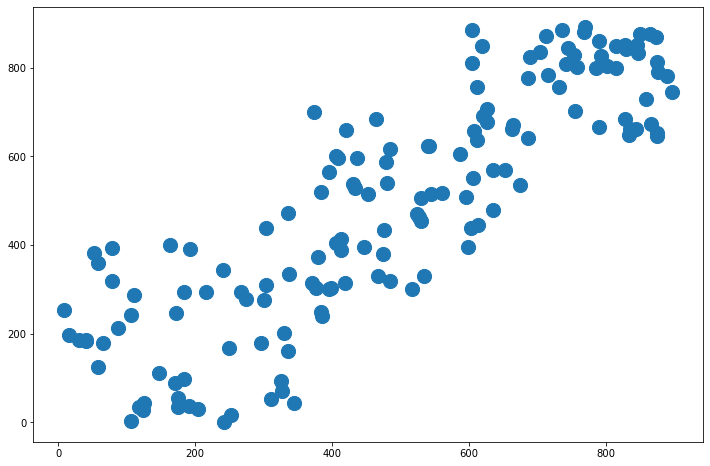

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], s=200)

In [6]:
labels_1 = np.array([0 for i in range(50)])
labels_2 = np.array([1 for i in range(50)])
labels_3 = np.array([2 for i in range(50)])
labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis=0)

In [7]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
df = pd.DataFrame({'data_x': data[:,0], 'data_y': data[:,1], 'labels': labels})

df.sample(10)

,data_x,data_y,labels
86,534.0,331.0,1
137,847.0,833.0,2
59,587.0,604.0,1
113,897.0,744.0,2
93,516.0,300.0,1
32,395.0,300.0,0
8,184.0,98.0,0
148,875.0,645.0,2
106,876.0,789.0,2
10,66.0,179.0,0


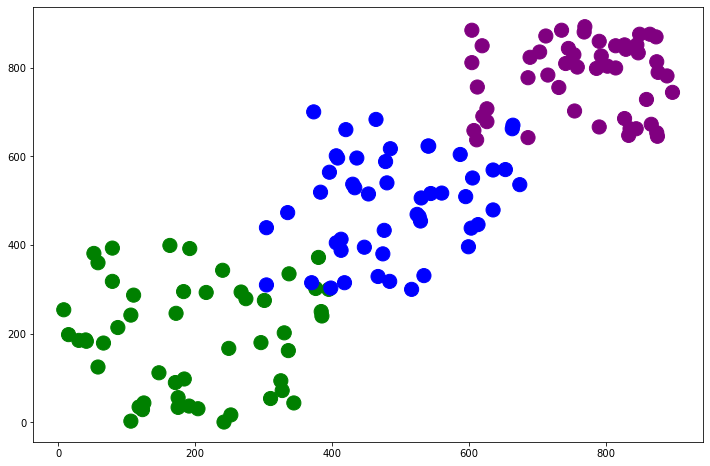

In [9]:
colors = ['green', 'blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors))

In [10]:
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)

In [11]:
kmeans_model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
centroids = kmeans_model.cluster_centers_ # labels could be different than original data
centroids

array([[480.03921569, 477.66666667],
       [762.94230769, 773.15384615],
       [183.82978723, 184.74468085]])

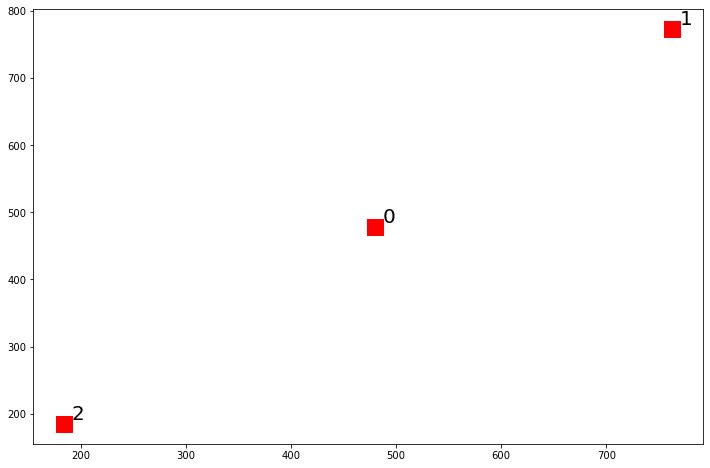

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

In [14]:
print("homogeneity_score", metrics.homogeneity_score(labels, kmeans_model.labels_))
#scores are not effected by differences between the real labels and the cluster output designations
print("completeness_score", metrics.completeness_score(labels, kmeans_model.labels_))
#will probably be close to homogeneity but slightly different
print("v_measure_score", metrics.v_measure_score(labels, kmeans_model.labels_))
#fyi: harmonic mean typically used to find the average of 2 rates
print("adjusted_rand_score", metrics.adjusted_rand_score(labels, kmeans_model.labels_))
#adjusted for chance
print("adjusted_mutual_info_score", metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))
#also adjusted for chance # 0 = randomly laeled
print("silhouette_score", metrics.silhouette_score(data, kmeans_model.labels_))
#using distance measure - similar to own cluster + different from other clusters

homogeneity_score 0.8341079644951467
completeness_score 0.8348236134594998
v_measure_score 0.8344656355398047
adjusted_rand_score 0.8660664140002747
adjusted_mutual_info_score 0.8323930166609845
silhouette_score 0.5146417586289651


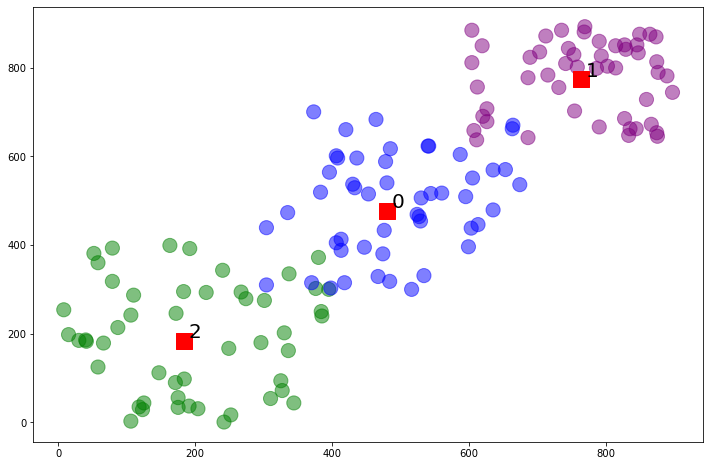

In [15]:
colors = ['green', 'blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors), alpha=.5)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

In [16]:
data_test = np.array([[442.,621.],
                     [50.,153.],
                     [333., 373.],
                     [835., 816.]])

In [17]:
label_pred = kmeans_model.predict(data_test)
label_pred

array([0, 2, 0, 1])

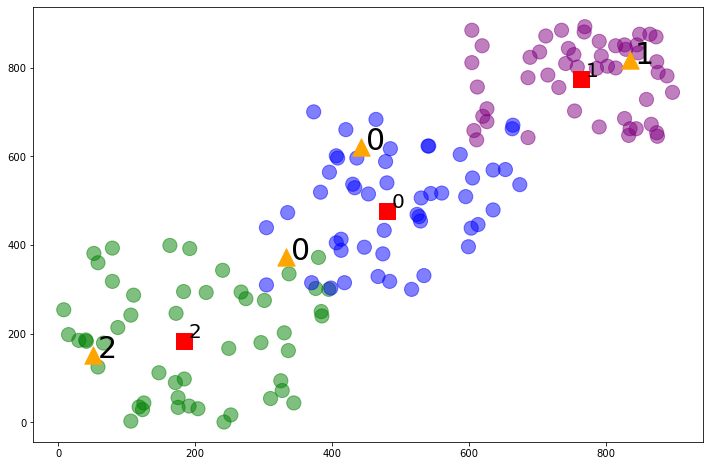

In [18]:
colors = ['green', 'blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors), alpha=.5)

plt.scatter(data_test[:,0], data_test[:,1], c='orange', s=300, marker='^')
for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0]+7, data_test[i][1] -7), fontsize=30)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

# iris dataset

In [19]:
iris_df = pd.read_csv('datasets/iris.csv', skiprows=1, 
                      names=['sepal-length','sepal-width','petal-length','petal-width','class'])
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
#shuffle
iris_df =iris_df.sample(frac=1).reset_index(drop=True)
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.0,3.0,4.8,1.8,Iris-virginica
1,7.7,3.0,6.1,2.3,Iris-virginica
2,5.8,2.7,3.9,1.2,Iris-versicolor
3,6.4,3.1,5.5,1.8,Iris-virginica
4,6.8,3.2,5.9,2.3,Iris-virginica


In [21]:
iris_df['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

In [22]:
iris_df.shape

(150, 5)

In [23]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.0,3.0,4.8,1.8,2
1,7.7,3.0,6.1,2.3,2
2,5.8,2.7,3.9,1.2,1
3,6.4,3.1,5.5,1.8,2
4,6.8,3.2,5.9,2.3,2


<AxesSubplot:xlabel='sepal-length', ylabel='sepal-width'>

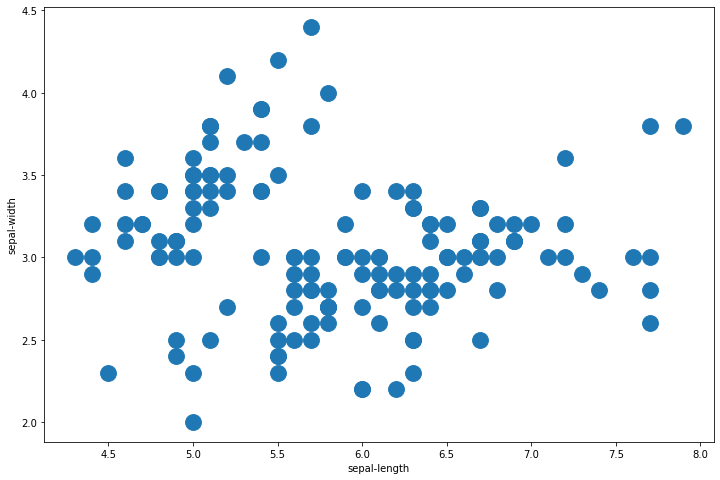

In [24]:
iris_df.plot.scatter('sepal-length', 'sepal-width', figsize=(12,8), s=250)

<AxesSubplot:xlabel='petal-width', ylabel='petal-length'>

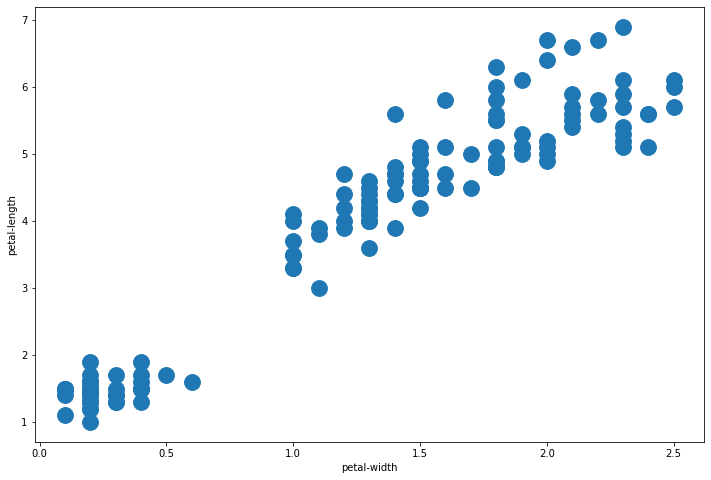

In [25]:
iris_df.plot.scatter('petal-width', 'petal-length', figsize=(12,8), s=250)

<AxesSubplot:xlabel='sepal-length', ylabel='petal-length'>

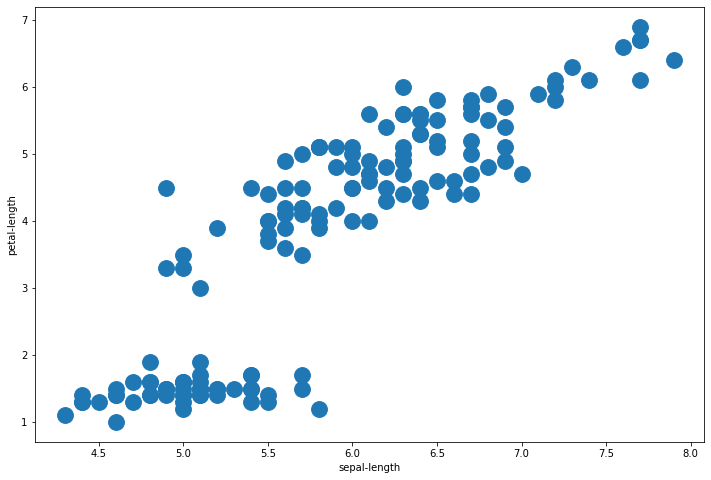

In [26]:
iris_df.plot.scatter('sepal-length', 'petal-length', figsize=(12,8), s=250)

In [27]:
iris_2D = iris_df[['sepal-length','petal-length']]
iris_2D.sample(5)

,sepal-length,petal-length
115,6.7,5.8
45,5.5,4.0
20,5.2,1.5
7,6.4,5.3
17,5.1,1.7


In [28]:
iris_2D.shape

(150, 2)

In [29]:
iris_2D = np.array(iris_2D)

In [30]:
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)

In [31]:
kmeans_model_2D.labels_ #may not match original class labels: 0 here may not map to 0 in df

array([2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1,
       2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0,
       2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1,
       2, 1, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1,
       0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1])

In [32]:
centroids_2D = kmeans_model_2D.cluster_centers_

centroids_2D

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49411765],
       [5.87413793, 4.39310345]])

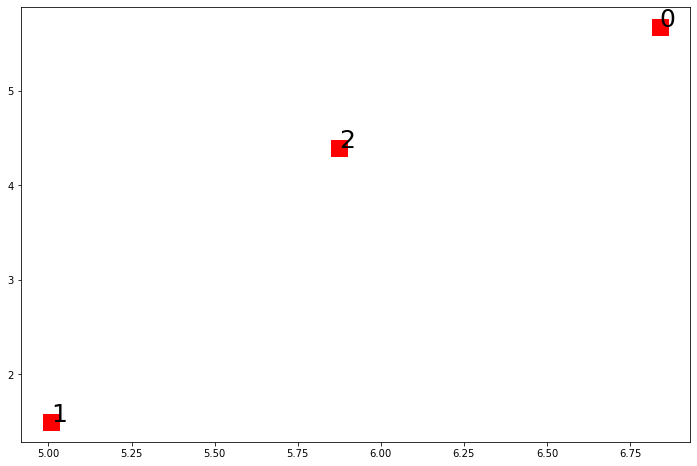

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i,(centroids_2D[i][0]  , centroids_2D[i][1]) , fontsize=25)

In [34]:
iris_labels = iris_df['class']

In [35]:
print("homogeneity_score", metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))
#scores are not effected by differences between the real labels and the cluster output designations
print("completeness_score", metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))
#will probably be close to homogeneity but slightly different
print("v_measure_score", metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))
#fyi: harmonic mean typically used to find the average of 2 rates
print("adjusted_rand_score", metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))
#adjusted for chance
print("adjusted_mutual_info_score", metrics.adjusted_mutual_info_score(iris_labels, kmeans_model_2D.labels_))
#also adjusted for chance # 0 = randomly laeled
print("silhouette_score", metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))
#using distance measure - similar to own cluster + different from other clusters

homogeneity_score 0.7033177646052958
completeness_score 0.7096993707802843
v_measure_score 0.706494157075837
adjusted_rand_score 0.6988627672348092
adjusted_mutual_info_score 0.702802453140913
silhouette_score 0.5890612473759282


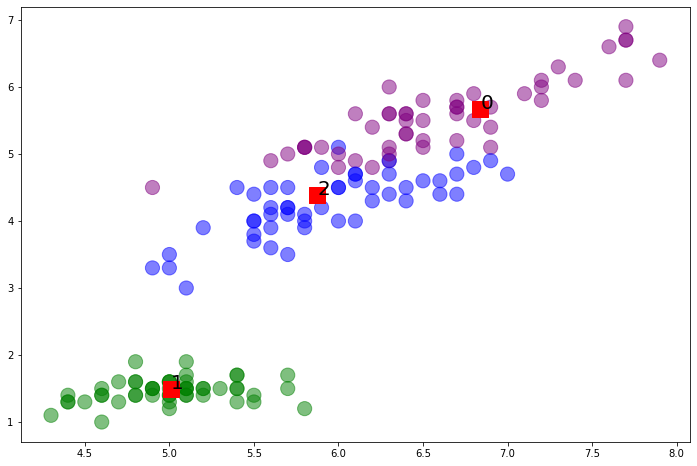

In [36]:
colors = ['green', 'blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c=iris_df['class'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=.5)

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')
for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0] , centroids_2D[i][1] ), fontsize=20)

In [37]:
iris_features = iris_df.drop('class',axis=1)
iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,6.0,3.0,4.8,1.8
1,7.7,3.0,6.1,2.3
2,5.8,2.7,3.9,1.2
3,6.4,3.1,5.5,1.8
4,6.8,3.2,5.9,2.3


In [38]:
iris_labels = iris_df['class']
iris_labels.sample(5)

7     2
41    1
59    0
76    0
21    0
Name: class, dtype: int32

In [39]:
kmeans_model = KMeans(n_clusters=3).fit(iris_features)

In [40]:
kmeans_model.labels_

array([1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0,
       1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2,
       1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0,
       1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0])

In [41]:
kmeans_model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [42]:
print("homogeneity_score", metrics.homogeneity_score(iris_labels, kmeans_model.labels_))
print("completeness_score", metrics.completeness_score(iris_labels, kmeans_model.labels_))
print("v_measure_score", metrics.v_measure_score(iris_labels, kmeans_model.labels_))
print("adjusted_rand_score", metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))
print("adjusted_mutual_info_score", metrics.adjusted_mutual_info_score(iris_labels, kmeans_model.labels_))
print("silhouette_score", metrics.silhouette_score(iris_features, kmeans_model.labels_))


homogeneity_score 0.7514854021988338
completeness_score 0.7649861514489815
v_measure_score 0.7581756800057784
adjusted_rand_score 0.7302382722834697
adjusted_mutual_info_score 0.7551191675800484
silhouette_score 0.5525919445499757


# other algorithms
### categories
* centroid-based (e.g. kmeans) - central reference vector (may not be part of original data) distances measueres
* hierarchical (e.g. agglomerative and BIRCH) - connectivity based - no central mean - points are compared with one another
    * max distance needed to connect diff parts of the cluster
    * tree of points where leaves are merged to create cluster
    * start with each point in its own cluster and merge closest clusters iteratively
    * dendrogram <img src='dendrogram.png' width=300 />
    * choose a different branch to get diff # of clusters
    * types
        * agglomerative = combine points
        * divisive = start with 1 big cluster and divide (not in scikit-learn ?)
    * vs kmeans: does not require a means to aggregate points, or repesent data in hypercube, easier data representation, not as scalable
* distribution-based (e.g. Gaussian mixture) - based on statistica distributions - clusters are likely to belong to the same distribution
    * sample random objects from distribution 
    * prone to over-fitting and complex
* desnity-based (e.g. DBSCAN and mean shift) - create cluster from areas that have a higher density of points
    * objects in sparse areas are considered noise or border points

####### meanshift , db scan, mean shift, agglomerative, BIRCH, affinity, spectral, mini-batch

In [43]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, MeanShift, Birch, AffinityPropagation, MiniBatchKMeans

In [44]:
#data reload
iris_df = pd.read_csv('datasets/iris.csv', skiprows=1, 
                      names=['sepal-length','sepal-width','petal-length','petal-width','class'])
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
#shuffle
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

In [46]:
label_encoding = preprocessing.LabelEncoder()
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.9,3.1,5.1,2.3,2
1,6.0,3.0,4.8,1.8,2
2,5.4,3.0,4.5,1.5,1
3,5.1,2.5,3.0,1.1,1
4,5.8,4.0,1.2,0.2,0


In [47]:
iris_features = iris_df.drop('class',axis=1)
iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,6.9,3.1,5.1,2.3
1,6.0,3.0,4.8,1.8
2,5.4,3.0,4.5,1.5
3,5.1,2.5,3.0,1.1
4,5.8,4.0,1.2,0.2


In [48]:
iris_labels = iris_df['class']
iris_labels.sample(5)

62     0
57     1
67     0
82     2
149    0
Name: class, dtype: int32

In [49]:
def build_model(clustering_model, data, labels):
    
    model = clustering_model(data)

    res = { 'homogeneity_score': metrics.homogeneity_score(labels, model.labels_),
            'completeness_score': metrics.completeness_score(labels, model.labels_),
            'v_measure_score': metrics.v_measure_score(labels, model.labels_),
            'adjusted_rand_score': metrics.adjusted_rand_score(labels, model.labels_),
            'adjusted_mutual_info_score': metrics.adjusted_mutual_info_score(labels, model.labels_),
            'silhouette_score': metrics.silhouette_score(data, model.labels_)}
    
    print(res)
    return model, pd.Series(res).to_frame().T

            

In [50]:
def k_means(data, n_clusters=3, max_iter=1000):
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    
    return model

In [51]:
(m,s) = build_model(k_means, iris_features, iris_labels)

{'homogeneity_score': 0.7514854021988338, 'completeness_score': 0.7649861514489815, 'v_measure_score': 0.7581756800057784, 'adjusted_rand_score': 0.7302382722834697, 'adjusted_mutual_info_score': 0.7551191675800484, 'silhouette_score': 0.552591944549976}


In [52]:
s

,homogeneity_score,completeness_score,v_measure_score,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score
0,0.751485,0.764986,0.758176,0.730238,0.755119,0.552592


## choosing the algorithm
#### choose based on number of clusters and size of datasets
<img src="cluschoice_table.png" width=500 />


* Birch/Agglomerative
    * Birch removes outliers (noise)
    * incrementally process (recalc as new data is added)
    * does scale well to high dimensional data (large # features)
    * agglomerative works when Euclidian distances is not present
    
* Mean shift/ affinity
    * small datasets - large # clusters
    * uneven cluster sizes and manifold shapes
    * mean = pariwise distances between points - computationally intensive
    * affinity uses graph distance - doesn't need # clusters up front
    
* kmeans/dbscan
    * even cluster sizes and flat surface data
    * better performance with mini-batch (faster and almost as good)
    * dbscan = manifolds and uneven cluster sizes
*spectral
    * smaller datasets
    * graph distance
    * intuitive results
    * even cluster sizes
    * works for manifold
    * reslies on distance


## agglomerative clustering
* bottom-up
* nearness = hyperparameter
    * metric: Euclidian(l2), (l1) manhattan, cosine of angles of 2 feature vectors, pre-computed matrix
    * linkage criteria: 
        * single - min of distance between all points in 2 clusters
        * complete(maximum) - max diance of all points in 2 clustesrs 
        * average - average distance of each points in 2 clustesrs
        * ward - default - minimizes the variances of points in the 2 clusters

In [53]:
def agglomerative_fn(data, n_clusters=3):
    model = AgglomerativeClustering(n_clusters=n_clusters).fit(data)
    return model

In [54]:
m,s = build_model(agglomerative_fn, iris_features, iris_labels)
s

{'homogeneity_score': 0.7608008469718723, 'completeness_score': 0.7795958005591144, 'v_measure_score': 0.7700836616487869, 'adjusted_rand_score': 0.7311985567707745, 'adjusted_mutual_info_score': 0.7671669615713111, 'silhouette_score': 0.5540972908150553}


,homogeneity_score,completeness_score,v_measure_score,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score
0,0.760801,0.779596,0.770084,0.731199,0.767167,0.554097


## dbscan clustering
* Density-Based Spatial Clustering of Applications with Noise
* density based
* uneven cluster sizes - works on manifolds
* not as good as BIRCH in outlier handling
* parameters
    * eps - minimum distance - points within are considered neighbors
    * min_samples = min # of points needed to be dense
        * greater than number of features
        * noisy data should have larger value
       

In [55]:
def dbscan_fn(data, eps=.45, min_samples=4):
    model=DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    print(type(model))
    return model

In [56]:
m,s = build_model(dbscan_fn, iris_features, iris_labels)
s

<class 'sklearn.cluster._dbscan.DBSCAN'>
{'homogeneity_score': 0.5773205947971476, 'completeness_score': 0.6093983666695363, 'v_measure_score': 0.5929259393972258, 'adjusted_rand_score': 0.5084974632998323, 'adjusted_mutual_info_score': 0.5842965531192635, 'silhouette_score': 0.37208250029643425}


,homogeneity_score,completeness_score,v_measure_score,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score
0,0.577321,0.609398,0.592926,0.508497,0.584297,0.372083


## mean shift clustering
* define a neighborhood for all points - apply a function (kernel) to all points in the neighberhood
    * flat kernel = sum of all points
    * Guassian (RBF - radial basis function) kernel - probablility weighted sum of points
        * Guassian distribution = normal mean &mu; and stdev &sigma;
        * mean &mu; is center point and stdev &sigma; is 'bandwidth' (a hyperparameter)
    * shift points toward those with higher RBF
    * stop when points stop moving
    * Bandwidth
        * low = tall skinny - ignore pionts far from mean
        * high = broad flat
    * vs kmeans
        * no need to specify k up-front
        * can handle more complex data (e.g. image pixels)
        * more hyperparameter tuning
        * computationally intensive o(n<sup>2</sup>)
        * better outlier handling

In [57]:
def mean_shift_fn(data, bandwidth=.85):
    model = MeanShift(bandwidth=bandwidth).fit(data)
    return model

In [58]:
m,s = build_model(mean_shift_fn, iris_features, iris_labels)
s

{'homogeneity_score': 0.7603645798041669, 'completeness_score': 0.7717917344958113, 'v_measure_score': 0.7660355440487252, 'adjusted_rand_score': 0.7436826319432357, 'adjusted_mutual_info_score': 0.763083127524581, 'silhouette_score': 0.5509296349732906}


,homogeneity_score,completeness_score,v_measure_score,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score
0,0.760365,0.771792,0.766036,0.743683,0.763083,0.55093


## BIRCH clustering
* Balanced Iterative Reducing and Clustering using Hierarchies
    * tries to merge using trees
* large dataset required - many clusters output
* detects/removes outliers
* incrementally processes incoming data (online learning/clustering)
* very time/memory efficient (can work on parts of the data)
* doesn't work well with large # features

In [59]:
def birch_fn(data, n_clusters=3):
    model = Birch(n_clusters=n_clusters).fit(data)
    return model

In [60]:
m,s = build_model(birch_fn, iris_features, iris_labels)
s

{'homogeneity_score': 0.7001154370964626, 'completeness_score': 0.7454382753016934, 'v_measure_score': 0.7220663465703595, 'adjusted_rand_score': 0.64225125183629, 'adjusted_mutual_info_score': 0.7184641371994781, 'silhouette_score': 0.5107111996874596}


,homogeneity_score,completeness_score,v_measure_score,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score
0,0.700115,0.745438,0.722066,0.642251,0.718464,0.510711


## affinity propagation
* small datasets into many clusters
* uneven clusters sizes and manifold data
* does not require K up-front
* no assumptions about internal data
* graph distances - nearest neighbors
* exemplars - most representative of other data in the dataset
* data points are nodes that pass messages to one another - messages = willingness of point to be exemplar


In [61]:
def affinity_propagation_fn(data, damping=.6, max_iter=1000):
    """
    damping = extent to which the current value is maintained relative to incoming values = learning rate
    """
    model=AffinityPropagation(damping=damping, max_iter=max_iter).fit(data)
    return model

In [62]:
m,s = build_model(affinity_propagation_fn, iris_features, iris_labels)
s

{'homogeneity_score': 0.8512533506223854, 'completeness_score': 0.49170090756246776, 'v_measure_score': 0.6233451996084364, 'adjusted_rand_score': 0.4373692389986675, 'adjusted_mutual_info_score': 0.6124927560312433, 'silhouette_score': 0.348833613127065}


C:\Users\Rob.DESKTOP-HBG5EOT\.conda\envs\myenv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


,homogeneity_score,completeness_score,v_measure_score,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score
0,0.851253,0.491701,0.623345,0.437369,0.612493,0.348834


## mini-batch k-means
* perform kmeans on randomly sampled subsets of the data
* signifcantly faster + slightly worse (trade-off generally acceptable)

In [63]:
def mini_batch_kmeans_fn(data, n_clusters=3, max_iter=1000):
    model = MiniBatchKMeans(n_clusters=n_clusters, max_iter=max_iter, batch_size=20).fit(data)
    return model
    

In [65]:
m,s = build_model(mini_batch_kmeans_fn, iris_features, iris_labels)
s

{'homogeneity_score': 0.7364192881252849, 'completeness_score': 0.7474865805095324, 'v_measure_score': 0.7419116631817836, 'adjusted_rand_score': 0.7163421126838475, 'adjusted_mutual_info_score': 0.7386548254402863, 'silhouette_score': 0.5509643746707443}


,homogeneity_score,completeness_score,v_measure_score,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score
0,0.736419,0.747487,0.741912,0.716342,0.738655,0.550964


## spectral
* pre-computed similarity matrix
* simple/intuitive
* even cluster size
* works with manifold data
* affinity matrix using nearest neighbors - can caclulate or pass-in as arg
    * how similar points are
* Eigenvalue (spectrum) decomposition behidn the scenes
    * map vectors to lower dimensionality space
    * apply kmeans to simplified data
    * similar to applying kernel trick prior to running kmeans
* dbscan is a special case of spectral

In [71]:
from sklearn.cluster import SpectralClustering
SS=1000 #self-simliarity
IS = 10 # intra cluster self-simlarity
LS = .01 # low similarity - diff for points in separate clusters


In [68]:
similarity_mat = [[SS, IS, IS, LS, LS, LS, LS, LS, LS],
                  [IS, SS, IS, LS, LS, LS, LS, LS, LS],
                  [IS, IS, SS, LS, LS, LS, LS, LS, LS],
                  [LS, LS, LS, SS, IS, IS, LS, LS, LS],
                  [LS, LS, LS, IS, SS, IS, LS, LS, LS],
                  [LS, LS, LS, IS, IS, SS, LS, LS, LS],
                  [LS, LS, LS, LS, LS, LS, SS, IS, IS],
                  [LS, LS, LS, LS, LS, LS, IS, SS, IS],
                  [LS, LS, LS, LS, LS, LS, IS, IS, SS]] 

In [72]:
spectral_model = SpectralClustering(n_clusters=3, affinity='precomputed').fit(similarity_mat)

In [73]:
spectral_model.labels_

array([0, 0, 0, 2, 2, 2, 1, 1, 1])

# hyperparameter tuning
* ParamterGrid
* score to evaluate models - Silhouette (doesn't require labels)
    * derived from silhouette coeffecients - simlarity to same cluster, diff form other clusters
    * overall score is average of point scores
        * i is a given point
        * b<sup>i</sup>  = mean distance of point i from all points in the neaest cluster
        * a<sup>i</sup> = mean distances of point i from all other points in the same cluster
    <img src='sil_coef_equation.png' width=200 />
    * typically between -1 to 1
        * 0 scores indiciate overlap
* kmeans hyperparamters
    * number of clusters (most important) - sometimes obvious
        * standar method to find best value
            * elbow method
                * pick a range of values and implement kmeans for all
                * plot average distance from centroid for each value
                * find elbow in plot
                * <img src='kmeans_elbow.png' width=400 />
            * silhouette method
                * pick range of value
                * plot silhouettes for each
                * pick the K with the highest silhouette (closest to 1 - largest positive values (excluding outliers?))
                    * silhouettes coef < 1 are outlier points
                * closeness to same cluster should be much much lower than closeness to other cluster
    * seeds (initial values)
        * random is fine for small data
        * big data techniques
            * PCA - normalized - divide into bins
    * distances measures - typically euclidian
        * mahalanobis distance - normalize each dimensiont to have equal variance
        * cosine distnace - cosine of angle between point and centroid
       
        
    

In [75]:
from sklearn.model_selection import ParameterGrid
#cross-validation does not make sense for clustering

In [77]:
drivers_df = pd.read_csv('datasets/driver_details.csv')
drivers_df.head()
#distance - how far do they drive
#speeding - how fast do they go

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [78]:
drivers_df.shape

(4000, 3)

In [79]:
drivers_df[drivers_df.isnull().any(axis=1)]#no null values

,Driver_ID,Distance_Feature,Speeding_Feature


In [80]:
drivers_df.describe()

,Driver_ID,Distance_Feature,Speeding_Feature
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [81]:
drivers_features = drivers_df.drop('Driver_ID', axis=1)

In [87]:
parameters = {'n_clusters': [2,3,4,5,10,20,30]}

paramater_grid = ParameterGrid(parameters)


In [88]:
list(paramater_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [89]:
best_score=-1
model=KMeans()

In [90]:
for g in paramater_grid:
    model.set_params(**g)
    model.fit(drivers_features)
    
    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameter', g, 'Score: ', ss)
    if ss > best_score:
        best_score=ss
        best_grid=g

Parameter {'n_clusters': 2} Score:  0.8490223286225532
Parameter {'n_clusters': 3} Score:  0.8231396834167266
Parameter {'n_clusters': 4} Score:  0.5907475009381601
Parameter {'n_clusters': 5} Score:  0.5128161654454148
Parameter {'n_clusters': 10} Score:  0.435891327117035
Parameter {'n_clusters': 20} Score:  0.3658319130185929
Parameter {'n_clusters': 30} Score:  0.33462473307408913


In [91]:
best_grid

{'n_clusters': 2}

<AxesSubplot:xlabel='Distance_Feature', ylabel='Speeding_Feature'>

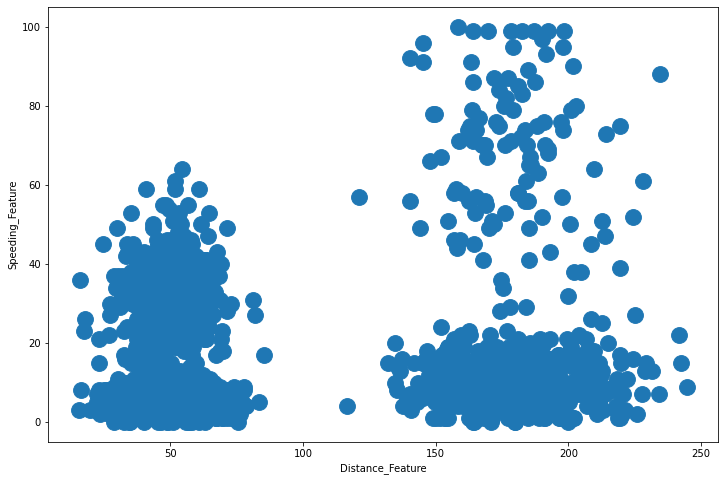

In [92]:
drivers_features.plot.scatter('Distance_Feature', 'Speeding_Feature', s=250, figsize=(12,8))

## dbscan HPT

In [93]:
parameters = {'eps': [.9,1.,5.,10.,12.,14.,20.],'min_samples':[5,7,10,12]}
paramater_grid = ParameterGrid(parameters)

list(paramater_grid)

[{'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 7},
 {'eps': 0.9, 'min_samples': 10},
 {'eps': 0.9, 'min_samples': 12},
 {'eps': 1.0, 'min_samples': 5},
 {'eps': 1.0, 'min_samples': 7},
 {'eps': 1.0, 'min_samples': 10},
 {'eps': 1.0, 'min_samples': 12},
 {'eps': 5.0, 'min_samples': 5},
 {'eps': 5.0, 'min_samples': 7},
 {'eps': 5.0, 'min_samples': 10},
 {'eps': 5.0, 'min_samples': 12},
 {'eps': 10.0, 'min_samples': 5},
 {'eps': 10.0, 'min_samples': 7},
 {'eps': 10.0, 'min_samples': 10},
 {'eps': 10.0, 'min_samples': 12},
 {'eps': 12.0, 'min_samples': 5},
 {'eps': 12.0, 'min_samples': 7},
 {'eps': 12.0, 'min_samples': 10},
 {'eps': 12.0, 'min_samples': 12},
 {'eps': 14.0, 'min_samples': 5},
 {'eps': 14.0, 'min_samples': 7},
 {'eps': 14.0, 'min_samples': 10},
 {'eps': 14.0, 'min_samples': 12},
 {'eps': 20.0, 'min_samples': 5},
 {'eps': 20.0, 'min_samples': 7},
 {'eps': 20.0, 'min_samples': 10},
 {'eps': 20.0, 'min_samples': 12}]

In [94]:
len(paramater_grid)#models

28

In [96]:
%%time
model = DBSCAN()
best_score = -1
for g in paramater_grid:
    model.set_params(**g)
    model.fit(drivers_features)
    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss> best_score:
        best_score = ss
        best_grid = g

Parameter:  {'eps': 0.9, 'min_samples': 5} Score:  -0.6057173612292268
Parameter:  {'eps': 0.9, 'min_samples': 7} Score:  -0.4265046999507063
Parameter:  {'eps': 0.9, 'min_samples': 10} Score:  -0.39254168253371013
Parameter:  {'eps': 0.9, 'min_samples': 12} Score:  -0.4286838741223884
Parameter:  {'eps': 1.0, 'min_samples': 5} Score:  -0.6155746493060738
Parameter:  {'eps': 1.0, 'min_samples': 7} Score:  -0.41637001640330673
Parameter:  {'eps': 1.0, 'min_samples': 10} Score:  -0.3837814631696031
Parameter:  {'eps': 1.0, 'min_samples': 12} Score:  -0.38648235283744914
Parameter:  {'eps': 5.0, 'min_samples': 5} Score:  0.31011275260225
Parameter:  {'eps': 5.0, 'min_samples': 7} Score:  0.7820011223700856
Parameter:  {'eps': 5.0, 'min_samples': 10} Score:  0.7974222681120255
Parameter:  {'eps': 5.0, 'min_samples': 12} Score:  0.7914367881923341
Parameter:  {'eps': 10.0, 'min_samples': 5} Score:  0.7598056658175874
Parameter:  {'eps': 10.0, 'min_samples': 7} Score:  0.8157570071704705
Par

In [97]:
best_grid

{'eps': 20.0, 'min_samples': 5}

In [98]:
model.set_params(**best_grid)
model.fit(drivers_features)

DBSCAN(eps=20.0)

In [99]:
len(model.labels_)# noise data will have label -1

4000

In [100]:
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters

2

In [101]:
n_noise = list(model.labels_).count(-1)
n_noise

0

In [103]:
another_grid = {'eps':5., 'min_samples':5} #bad model params yield more noisy points

model.set_params(**another_grid)
model.fit(drivers_features)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('number of clusters: ', n_clusters)

n_noise = list(model.labels_).count(-1)
print('noisy points: ', n_noise)

number of clusters:  7
noisy points:  117


In [104]:
another_grid = {'eps':5., 'min_samples':7} #bad model params yield more noisy points
# with higher min samples - fewer clusters are formed

model.set_params(**another_grid)
model.fit(drivers_features)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('number of clusters: ', n_clusters)

n_noise = list(model.labels_).count(-1)
print('noisy points: ', n_noise)

number of clusters:  3
noisy points:  157


## mean shift HPT

In [106]:
%%time
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(drivers_features) #time taken is quadratic in the number of samples - computationally expensive

Wall time: 697 ms


33.960524729584314

In [107]:
model = MeanShift(bandwidth=estimate_bandwidth(drivers_features)).fit(drivers_features)
metrics.silhouette_score(drivers_features, model.labels_)

0.8231396834167266

# clustering with image data
* vs tensorflow which works with a list of images as a single 4-D tensor

In [108]:
# using mnist handwritten dataset
mnist_data = pd.read_csv('datasets/train.csv')
mnist_data.head()
#28x28 = 784 pixels (single channel)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
mnist_data.shape

(42000, 785)

In [111]:
sorted(mnist_data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [112]:
mnist_features = mnist_data.drop('label', axis=1)
mnist_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
mnist_labels = mnist_data['label']
mnist_labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [114]:
#helper function
def display_image(index):
    print("Digit: ", mnist_labels[index])
    plt.imshow(mnist_features.loc[index].values.reshape(28,28), cmap='Greys')

Digit:  0


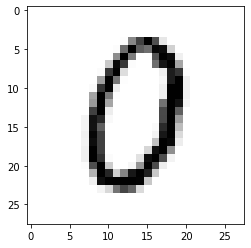

In [115]:
display_image(5)

Digit:  6


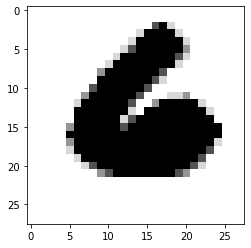

In [116]:
display_image(500)

In [118]:
%%time
kmeans_model = KMeans(n_clusters=10, max_iter=1000).fit(mnist_features)

In [119]:
kmeans_centroids = kmeans_model.cluster_centers_
kmeans_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [120]:
kmeans_centroids.shape

(10, 784)

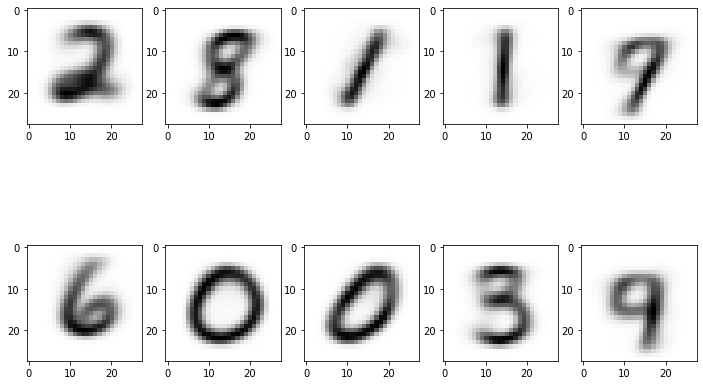

In [122]:
fig, ax = plt.subplots(figsize=(12,8))
for centroid in range(len(kmeans_centroids)):
    plt.subplot(2,5,centroid+1)
    plt.imshow(kmeans_centroids[centroid].reshape(28,28), cmap='Greys')

In [123]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [125]:
mnist_test = mnist_data.sample(10, replace=False)

mnist_test_features = mnist_test.drop('label', axis=1)
mnist_test_labels = mnist_test['label']

In [126]:
mnist_test_labels

7437     9
20488    9
22122    0
5011     4
484      1
28799    1
24799    7
16766    5
35375    9
18807    7
Name: label, dtype: int64

In [127]:
mnist_test_labels = np.array(mnist_test_labels)
mnist_test_labels

array([9, 9, 0, 4, 1, 1, 7, 5, 9, 7], dtype=int64)

In [128]:
pred_clusters = kmeans_model.predict(mnist_test_features)

In [130]:
pred_results = pd.DataFrame({'actual_digit': mnist_test_labels, 'pred_cluster': pred_clusters})
pred_results.head(10)
#need to remap pred_clusters to the digits above from imshow

,actual_digit,pred_cluster
0,9,9
1,9,9
2,0,6
3,4,4
4,1,2
5,1,3
6,7,4
7,5,8
8,9,9
9,7,9


In [133]:
%%time
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=10, max_iter=10000, batch_size=100).fit(mnist_features)

Wall time: 491 ms


In [134]:
minibatch_kmeans_centroids = mini_batch_kmeans_model.cluster_centers_
minibatch_kmeans_centroids.shape

(10, 784)

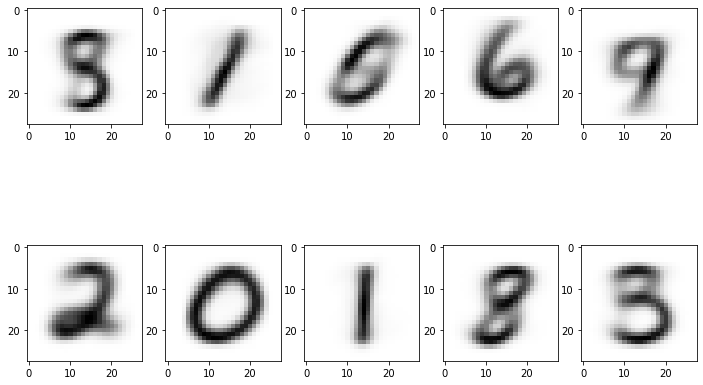

In [135]:
fig, ax = plt.subplots(figsize=(12,8))
for centroid in range(len(minibatch_kmeans_centroids)):
    plt.subplot(2,5,centroid+1)
    plt.imshow(minibatch_kmeans_centroids[centroid].reshape(28,28), cmap='Greys')